## 1. Import Pakages

In [2]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## 2. 하이퍼파라미터 세팅
학습에 필요한 하이퍼파리미터의 값을 초기화해줍니다.

미니배치의 크기, 학습할 Epoch(세대) 수, Learning rate(학습률) 값들을 다음과 같이 정합니다. 

In [3]:
batch_size = 100
num_epochs = 5
learning_rate = 0.001

## 3. Dataset 및 DataLoader 정의
우리가 사용할 [FashionMNIST](https://pytorch.org/docs/stable/torchvision/datasets.html#torchvision.datasets.FashionMNIST) 데이터셋을 정의해주고, 전체 데이터셋을 미니배치 단위로 뉴럴넷에 공급해주도록 DataLoader를 정의합니다. 


각각의 변수는 다음과 같은 의미를 갖습니다.
- **root**: FashionMNIST 데이터셋이 위치한 경로입니다. 여러분 대부분은 아직 이 데이터셋이 컴퓨터에 준비되어 있지 않을 것이지만, 걱정하실 필요 없습니다. torchvision 모듈을 통해 쉽게 다운로드 받을 수 있으며, 다운받은 데이터셋을 저장할 경로를 지정해주면 됩니다.
- **transform**: torchvision의 transforms 모듈은 다양한 이미지 전처리를 쉽게 사용할 수 있게 해줍니다. [transforms.Compose()](https://pytorch.org/docs/stable/torchvision/transforms.html?highlight=compose#torchvision.transforms.Compose)를 통해 여러 전처리 함수들을 하나로 묶어 사용할 수 있습니다. [ToTensor()](https://pytorch.org/docs/stable/torchvision/transforms.html?highlight=totensor#torchvision.transforms.ToTensor)는 이미지의 픽셀 값을 0~1 사이의 값으로 정규화하고 Pytorch의 Tensor 형태로 바꿔주는 처리를 담당합니다. [Normalize()](https://pytorch.org/docs/stable/torchvision/transforms.html?highlight=normalize#torchvision.transforms.Normalize)는 지정한 평균과 표준편차를 기준으로 데이터를 정규화해줍니다. 
- **train_data, test_data**: train 데이터와 test 데이터를 각각 정의합니다. 우리는 \__len__함수와 \__getitem__함수를 직접 구현해서 [Dataset class](https://pytorch.org/docs/stable/data.html?highlight=dataset#torch.utils.data.Dataset)를 customize 해야 한다고 배웠습니다. 다만 FashionMNIST에 대한 Dataset class는 torchvision 모듈에 이미 구현이 되어있기 때문에 그럴 필요가 없을 뿐입니다. 

다음을 읽고 코드를 완성해보세요.
- train data에 대한 [DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)를 정의하고 이를 **train_loader** 변수에 저장하세요. DataLoader 객체를 정의하는 데에 사용될 수 있는 인자는 여러가지가 있습니다. 여기서는 **dataset**, **batch_size**, **shuffle**에 대한 인자를 넘겨주어 객체를 선언할 것입니다. **dataset**, **batch_size**에 우리가 미리 정의한 변수들을 활용하여 적절한 인자를 넘겨주고, 매 에폭마다 무작위로 데이터가 샘플링되도록 **shuffle**에 적절한 인자를 넘겨주세요. 
- 마찬가지로 test data에 대한 DataLoader를 정의하여 **test_loader** 변수에 저장하되, test data는 데이터를 무작위로 샘플링할 필요가 없기 때문에 이에 주의하여 **shuffle**에 적절한 인자를 넘겨주세요.

In [6]:
root = '../data/fmnist'
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5,), std=(0.5,))])
train_data = dset.FashionMNIST(root=root, train=True, transform=transform, download=True)
test_data = dset.FashionMNIST(root=root, train=False, transform=transform, download=True)
# 코드 시작
train_loader = torch.utils.data.DataLoader(
                 dataset=train_data,
                 batch_size=batch_size,
                 shuffle=True)
test_loader = torch.utils.data.DataLoader(
                 dataset=test_data,
                 batch_size=batch_size,
                 shuffle=False)
# 코드 종료

## 4. 데이터 샘플 시각화
[FashionMNIST](https://github.com/zalandoresearch/fashion-mnist)는 MNIST와 마찬기지로 총 10개의 클래스로 구성되어 있으며 티셔츠, 바지 등 패션과 관련된 아이템들을 28x28 크기의 흑백 이미지로 구성한 데이터셋입니다.

**labels_map**에 각 class의 인덱스를 정의해둡니다.

**train_data**에 속한 데이터를 랜덤으로 선택해 pyplot 모듈을 사용하여 시각화합니다.

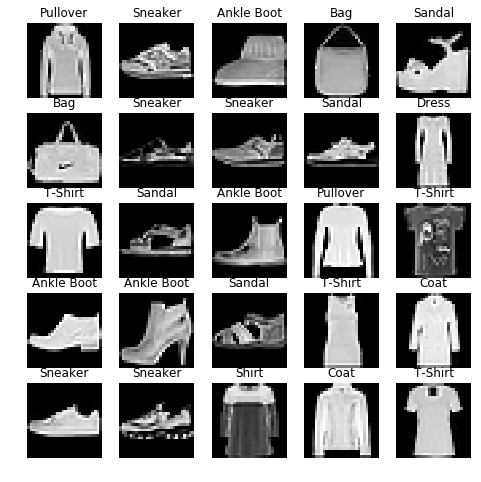

In [7]:
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'}
columns = 5
rows = 5
fig = plt.figure(figsize=(8,8))

for i in range(1, columns*rows+1):
    data_idx = np.random.randint(len(train_data))
    img = train_data[data_idx][0][0,:,:].numpy() # numpy()를 통해 torch Tensor를 numpy array로 변환
    label = labels_map[train_data[data_idx][1].item()] # item()을 통해 torch Tensor를 숫자로 변환
    
    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

## 5. 네트워크 설계
학습시킬 뉴럴네트워크를 설계합니다. 
이번 실습에서는 Multi Layer Perceptron(MLP) 레이어를 2개 쌓아 네트워크를 설계할 것입니다.

MLP는 한 레이어의 모든 뉴런이 다음 레이어의 뉴런과 완전히 연결된 계층(Fully connected layer)입니다. 

한편, MLP의 레이어를 깊게 쌓을 때에는 반드시 비선형 activation function이 필요합니다.
이번 실습에서는 ReLU를 사용 할 것입니다. 

다음을 읽고 코드를 완성해보세요.
- 첫번째 fully connected layer(FC layer)의 입력 feature 갯수는 입력 이미지의 픽셀 갯수인 28x28로, 출력 feature 갯수는 512로 하겠습니다. (물론 여기서 출력 feature 갯수는 여러분이 원하는대로 임의로 지정해도 좋습니다.)
- 두번째 FC layer의 출력 feature 갯수는 데이터의 class 갯수인 10으로 지정해야 합니다. 
- 그리고 각각의 FC layer 이후에는 ReLU 함수를 적용해보세요. 
- Pytorch의 FC layer는 [여기](https://pytorch.org/docs/stable/nn.html?highlight=linear#torch.nn.Linear)를, ReLu 함수는 [여기](https://pytorch.org/docs/stable/nn.html?highlight=relu#torch.nn.ReLU)를 참고하시면 됩니다. 

앞서 언급했듯이, DataLoader의 입력 데이터의 shape은 (batch_size, 1, 28, 28)입니다. 하지만 MLP의 입력은 (batch_size, 입력 feature 수)가 되어야 합니다. 따라서 우리는 Loader에서 나온 텐서의 shape을 이와 같은 형태로 변형해주어야 합니다. 이러한 변형을 flatten 이라고 부르기도 합니다. 

[nn.Sequential](https://pytorch.org/docs/stable/nn.html?highlight=sequential#torch.nn.Sequential)은 여러 모듈을 하나로 묶어주는 역할을 합니다. 

***퀴즈 #1 :*** 첫번째 MLP 레이어에서 학습되는 파라미터의 개수는?

***정답 : ***

In [8]:
class DNN(nn.Module):
    def __init__(self, num_classes=10):
        super(DNN, self).__init__()
        self.layer1 = nn.Sequential(
            # 코드 시작 
            nn.Linear(28*28, 512),
            nn.ReLU()
            # 코드 종료
        )
        self.layer2 = nn.Sequential(
            # 코드 시작
            nn.Linear(512, num_classes),
            nn.ReLU()
            # 코드 종료
        )
    
    def forward(self, x):
        x = x.view(x.size(0), -1) # flatten
        x_out = self.layer1(x)
        x_out = self.layer2(x_out)
        return x_out

## 6. 모델 생성 및 loss function, optimizer 정의
다음을 읽고 코드를 완성해보세요.
- **criterion** 변수에 Classification에서 자주 사용되는 [Cross Entropy Loss](https://pytorch.org/docs/stable/nn.html?highlight=entropy#torch.nn.CrossEntropyLoss)를 정의하세요.
- **optimizer** 변수에 [Adam optimizer](https://pytorch.org/docs/stable/optim.html?highlight=adam#torch.optim.Adam)를 정의하세요.

In [9]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = DNN().to(device)
#코드 시작 
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#코드 종료

***퀴즈 #2 :*** Classification 네트워크에서 가장 마지막에 적용되는 activation function으로, 출력을 확률값으로 변환하는 함수는?

***정답 : *** 

## 7. Training
이제 모델에 데이터를 미니배치 단위로 제공해서 학습을 시킬 단계입니다. 

다음을 읽고 코드를 완성해보세요.
- imgs, labels를 정의한 device로 옮겨주세요.
- 모델에 input 데이터를 주고, 그 출력을 **outputs** 변수에 저장하세요.
- 모델의 outputs과 train_loader에서 제공된 labels를 통해 loss를 구하고, 그 결과를 **loss** 변수에 저장하세요.
- 이전에 계산된 gradient를 모두 clear 해줍니다.
- Gradient를 계산합니다.
- Optimizer를 통해 파라미터를 업데이트합니다.

In [15]:
for epoch in range(num_epochs):
    for i, (imgs, labels) in enumerate(train_loader):
        # 코드 시작
        imgs = imgs.to(device)
        labels = labels.to(device)
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        print(outputs.shape)
        print(labels)
        print('==')
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # 코드 종료
        
        _, argmax = torch.max(outputs, 1)
        accuracy = (labels == argmax).float().mean()
        
        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'.format(
                epoch+1, num_epochs, i+1, len(train_loader), loss.item(), accuracy.item() * 100))

torch.Size([100, 10])
tensor([4, 6, 0, 6, 7, 5, 1, 9, 2, 0, 1, 6, 7, 7, 8, 9, 5, 1, 9, 4, 0, 6, 5, 6,
        3, 8, 5, 8, 3, 3, 2, 7, 5, 4, 9, 2, 7, 4, 3, 8, 6, 8, 2, 7, 1, 7, 7, 0,
        5, 3, 3, 0, 1, 6, 3, 1, 6, 7, 5, 0, 0, 6, 0, 7, 5, 6, 8, 7, 0, 6, 7, 5,
        8, 2, 5, 3, 9, 5, 4, 7, 8, 7, 8, 1, 6, 4, 8, 3, 3, 0, 6, 6, 0, 5, 8, 7,
        1, 8, 8, 7])
==
torch.Size([100, 10])
tensor([2, 2, 0, 1, 2, 1, 5, 5, 1, 7, 3, 8, 0, 7, 1, 5, 4, 0, 9, 1, 6, 6, 7, 6,
        5, 4, 6, 5, 3, 2, 4, 3, 3, 6, 3, 2, 4, 9, 2, 5, 3, 0, 9, 3, 4, 2, 7, 5,
        6, 6, 5, 6, 0, 0, 2, 1, 4, 4, 3, 9, 2, 1, 0, 1, 4, 4, 0, 2, 3, 1, 4, 1,
        7, 6, 0, 8, 1, 2, 2, 2, 4, 3, 4, 6, 9, 5, 9, 8, 6, 6, 5, 2, 7, 3, 2, 3,
        1, 4, 0, 8])
==
torch.Size([100, 10])
tensor([7, 5, 1, 6, 3, 2, 1, 6, 9, 8, 6, 3, 4, 9, 2, 3, 6, 4, 6, 2, 2, 4, 0, 6,
        2, 5, 1, 1, 8, 4, 6, 9, 6, 1, 3, 0, 9, 3, 8, 5, 1, 7, 0, 3, 4, 0, 8, 5,
        0, 1, 8, 3, 7, 4, 0, 9, 3, 9, 9, 2, 1, 8, 9, 2, 7, 2, 9, 0, 2, 5, 8, 9,
      

torch.Size([100, 10])
tensor([0, 6, 9, 6, 1, 1, 9, 9, 8, 8, 3, 3, 4, 1, 5, 3, 6, 8, 1, 1, 9, 4, 9, 0,
        3, 3, 1, 4, 3, 7, 4, 7, 0, 0, 5, 4, 6, 6, 3, 1, 1, 0, 9, 8, 2, 9, 4, 3,
        7, 8, 5, 9, 6, 0, 5, 3, 8, 3, 1, 1, 4, 9, 7, 8, 7, 4, 0, 8, 5, 7, 8, 9,
        7, 2, 1, 8, 1, 8, 8, 1, 0, 0, 5, 9, 0, 2, 0, 9, 9, 0, 5, 3, 0, 9, 4, 2,
        5, 5, 2, 6])
==
torch.Size([100, 10])
tensor([0, 7, 4, 6, 3, 4, 4, 9, 5, 9, 7, 9, 0, 9, 2, 6, 2, 5, 0, 6, 8, 5, 6, 4,
        0, 3, 6, 6, 2, 4, 5, 8, 9, 9, 8, 2, 2, 6, 1, 7, 3, 7, 5, 9, 7, 8, 9, 1,
        2, 1, 6, 4, 8, 6, 2, 9, 4, 1, 0, 9, 6, 6, 8, 1, 5, 2, 0, 8, 1, 4, 1, 7,
        0, 1, 2, 4, 0, 4, 2, 7, 1, 1, 0, 8, 7, 2, 8, 1, 4, 2, 0, 5, 9, 4, 8, 0,
        9, 3, 1, 1])
==
torch.Size([100, 10])
tensor([6, 5, 9, 1, 3, 8, 9, 1, 9, 9, 6, 2, 6, 7, 8, 9, 4, 8, 9, 4, 8, 0, 4, 7,
        4, 2, 4, 7, 2, 6, 1, 9, 5, 4, 7, 5, 4, 9, 6, 9, 4, 2, 6, 9, 8, 5, 7, 5,
        8, 3, 2, 3, 1, 0, 2, 2, 8, 0, 7, 6, 5, 4, 8, 6, 1, 2, 9, 6, 7, 7, 9, 7,
      

torch.Size([100, 10])
tensor([2, 5, 7, 8, 3, 3, 3, 7, 8, 4, 0, 4, 3, 5, 4, 2, 4, 1, 6, 8, 0, 8, 8, 1,
        9, 6, 9, 1, 6, 1, 0, 1, 9, 0, 2, 9, 2, 9, 1, 0, 3, 8, 5, 0, 0, 5, 6, 1,
        4, 5, 8, 6, 7, 9, 2, 7, 4, 9, 1, 2, 4, 5, 6, 8, 1, 5, 6, 3, 6, 6, 2, 6,
        2, 6, 0, 0, 8, 8, 6, 7, 0, 6, 7, 5, 5, 6, 9, 4, 8, 7, 4, 0, 5, 1, 5, 8,
        1, 2, 3, 4])
==
torch.Size([100, 10])
tensor([8, 5, 6, 3, 1, 1, 2, 7, 1, 5, 4, 9, 8, 7, 9, 4, 9, 6, 2, 4, 7, 9, 4, 7,
        5, 3, 7, 2, 4, 4, 2, 7, 6, 8, 9, 0, 3, 3, 0, 3, 7, 9, 0, 3, 9, 8, 3, 8,
        4, 2, 0, 5, 9, 7, 5, 5, 2, 5, 5, 4, 4, 2, 2, 5, 7, 7, 8, 5, 5, 5, 1, 1,
        7, 7, 4, 5, 9, 3, 8, 4, 9, 3, 8, 0, 9, 0, 3, 0, 3, 1, 5, 3, 8, 8, 9, 1,
        5, 0, 4, 5])
==
torch.Size([100, 10])
tensor([1, 4, 0, 9, 0, 5, 7, 5, 2, 8, 3, 4, 9, 5, 5, 5, 4, 4, 7, 3, 2, 6, 7, 5,
        4, 1, 7, 7, 4, 4, 5, 0, 2, 3, 0, 8, 6, 0, 0, 0, 1, 8, 4, 1, 2, 7, 6, 9,
        6, 3, 8, 1, 6, 0, 0, 3, 5, 6, 3, 7, 6, 5, 7, 8, 1, 0, 3, 6, 3, 5, 1, 9,
      

KeyboardInterrupt: 

## 8. Test
마지막으로 학습된 모델의 성능을 테스트할 차례입니다. 

[model.eval()](https://pytorch.org/docs/stable/nn.html?highlight=eval#torch.nn.Module.eval)은 모델을 evaluation 모드로 설정하겠다는 의미입니다. Evaluation 모드 가 필요한 이유는, batch normalization과 dropout이 training을 할 때와 test를 할 때 작동하는 방식이 다르기 때문입니다. Evaluation 모드를 설정해주어야 test를 할 때 일관된 결과를 얻을 수 있습니다.

[torch.no_grad()](https://pytorch.org/docs/stable/autograd.html?highlight=torch%20no_grad#torch.autograd.no_grad)는 torch.Tensor의 [requires_grad](https://pytorch.org/docs/stable/autograd.html?highlight=requires_grad#torch.Tensor.requires_grad)를 False로 만들어줍니다. Test 때는 backpropagation을 통해 gradient를 계산할 필요가 없기 때문에, Tensor의 requires_grad를 False로 바꿔줌을 통해 메모리를 낭비하지 않을 수 있습니다. 

Test를 마친 이후에 training을 더 진행하길 원하면 [model.train()](https://pytorch.org/docs/stable/nn.html?highlight=module%20train#torch.nn.Module.train)을 통해 다시 training 모드로 설정을 해주면 됩니다. 

In [8]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for i, (imgs, labels) in enumerate(test_loader):
        outputs = model(imgs)
        _, argmax = torch.max(outputs, 1) # max()를 통해 최종 출력이 가장 높은 class 선택
        total += imgs.size(0)
        correct += (labels == argmax).sum().item()
    
    print('Test accuracy for {} images: {:.2f}%'.format(total, correct / total * 100))
model.train()

Test accuracy for 10000 images: 71.27%


DNN(
  (layer1): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
  )
  (layer2): Sequential(
    (0): Linear(in_features=512, out_features=10, bias=True)
    (1): ReLU()
  )
)